In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

### PREPARE DATA

In [2]:
df = pd.read_excel('score.xlsx',sheet_name='Sheet1')
print(df)
print('-'*100)

# đầu vào
X = df.so_gio_hoc.values
X = np.array([X]).T # thêm dấu [] để thành 2 chiều mới chuyển vị được

# đầu ra
Y = df.diem.values

# Chia X,Y thành 2 bộ training & testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.6, random_state=2)
print(X_train)
print()
print(X_test)
print('-'*100)
print(Y_train)
print()
print(Y_test)

   so_gio_hoc  diem
0           2    30
1           3    35
2           4    40
3           5    44
4           6    48
5           7    60
6           8    66
7           9    70
8          10    75
----------------------------------------------------------------------------------------------------
[[ 5]
 [ 2]
 [ 7]
 [ 9]
 [10]]

[[6]
 [3]
 [8]
 [4]]
----------------------------------------------------------------------------------------------------
[44 30 60 70 75]

[48 35 66 40]


### SELECT & TRAIN MODEL

In [3]:
# SELECT
LR = lm.LinearRegression() # quy tắc: y = a.x + b
PR = make_pipeline(PolynomialFeatures(6), LR) # quy tắc: y = a.x**(degree) + b

# TRAIN
PR.fit(X_train,Y_train)

# CHECK QUY TẮC (Đ' BIT)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

### TEST

PREDICTED TRAINING Y: [44. 30. 60. 70. 75.]
ACTUAL TRAINING Y:    [44 30 60 70 75]
----------------------------------------------------------------------------------------------------


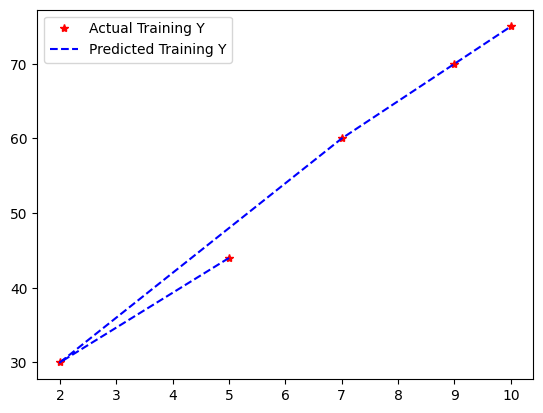

In [4]:
Yp_train = PR.predict(X_train)

print('PREDICTED TRAINING Y:',Yp_train)
print('ACTUAL TRAINING Y:   ',Y_train)
print('-'*100)

plt.plot(X_train,Y_train,'r*',label='Actual Training Y')
plt.plot(X_train,Yp_train,'b--',label='Predicted Training Y')
plt.legend(loc=0)

PREDICTED TESTING Y: [52.19931643 32.31712262 65.9603457  37.02482682]
ACTUAL TESTING Y:    [48 35 66 40]
----------------------------------------------------------------------------------------------------


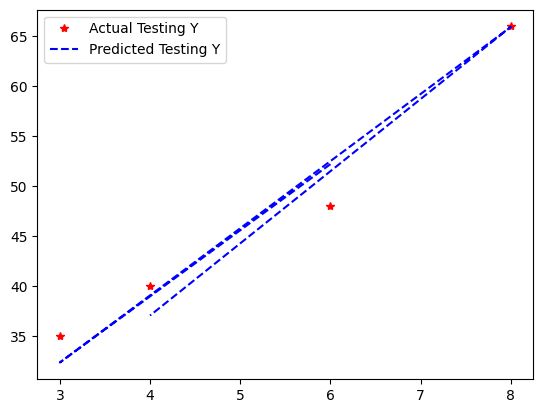

In [5]:
Yp_test = PR.predict(X_test)

print('PREDICTED TESTING Y:',Yp_test)
print('ACTUAL TESTING Y:   ',Y_test)
print('-'*100)

plt.plot(X_test,Y_test,'r*',label='Actual Testing Y')
plt.plot(X_test,Yp_test,'b--',label='Predicted Testing Y')
plt.legend(loc=0)

### EVALUATE MODEL

In [6]:
MSE1 = mean_squared_error(Y_test,Yp_test) # hay variance
MSE2 = mean_squared_error(Y_train,Yp_train)
print('MSE OF TESTING DATA:',MSE1)
print('MSE OF TRAINING DATA:',MSE2)
print('-'*100)

R2_1 = r2_score(Y_test,Yp_test) # R_squared
R2_2 = r2_score(Y_train,Yp_train)
print('R2 OF TESTING DATA:',R2_1)
print('R2 OF TRAINING DATA:',R2_2)

# MAE,MSE,RMSE gần về 0 càng tốt
# R2 gần về 1 càng tốt

MSE OF TESTING DATA: 8.421329353004824
MSE OF TRAINING DATA: 4.950764823422235e-25
----------------------------------------------------------------------------------------------------
R2 OF TESTING DATA: 0.9392783823127188
R2 OF TRAINING DATA: 1.0


### IMPLEMENT

In [7]:
Y_moi = PR.predict([[15]])
print(Y_moi)

[712.29311576]
